In [1]:
import os
os.chdir('../..')
import numpy as np
from rdkit.Chem import MolFromSmarts

PATTERN = MolFromSmarts("[#8]-[#6](=O)"+"~[#6]" * 5 +"(-[#8])=O")


def contains_pharm(mol):
    if mol.HasSubstructMatch(PATTERN):
        return True
    return False

RDKit WARNING: [10:34:06] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.inchi import MolFromInchi

import pickle
from molexplain.utils import DATA_PATH

In [3]:
with open(os.path.join(DATA_PATH, "ppb", "data_ppb.pt"), "rb") as handle:
    inchis, values = pickle.load(handle)

from tqdm import tqdm

filtered = []
idxs = []
for idx, inchi in enumerate(tqdm(inchis)):
    if contains_pharm(MolFromInchi(inchi)):
        filtered.append(inchi)
        idxs.append(idx)

vals = [values[idx] for idx in idxs]

 39%|███▊      | 1787/4634 [00:01<00:01, 1834.25it/s]RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
 46%|████▌     | 2140/4634 [00:01<00:01, 1573.40it/s]RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
 50%|████▉     | 2300/4634 [00:01<00:01, 1576.22it/s]RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:34:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:34:07] WARNING: not re

In [4]:
len(filtered)

5

In [5]:
from molexplain.vis import molecule_importance
from molexplain.utils import MODELS_PATH
from molexplain.train import DEVICE

Using backend: pytorch


In [6]:
import torch
model_pt = os.path.join(MODELS_PATH, 'ppb_noHs.pt')

from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

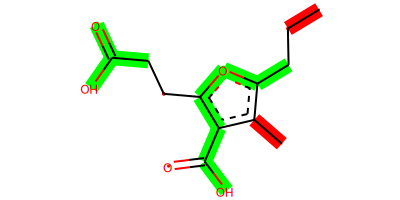

In [7]:
mol = MolFromInchi(filtered[0])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

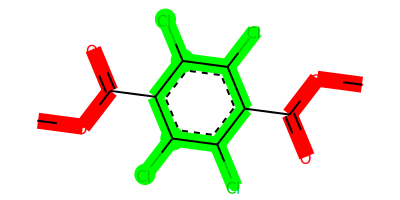

In [8]:
mol = MolFromInchi(filtered[1])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

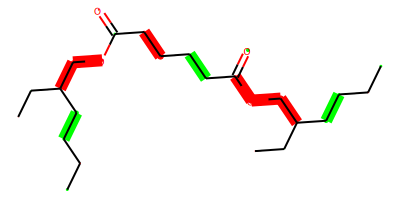

In [9]:
mol = MolFromInchi(filtered[2])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

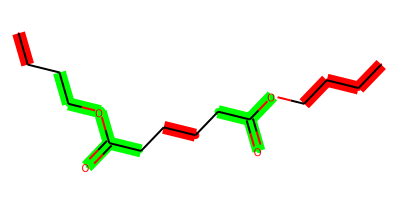

In [10]:
mol = MolFromInchi(filtered[3])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

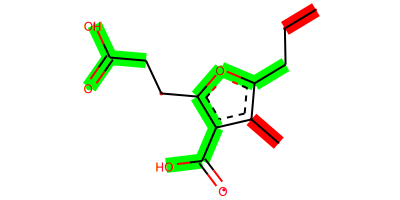

In [11]:
mol = MolFromInchi(filtered[4])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

In [12]:
# THESE ARE THE ONES SHOWN IN THE PAPER
# https://www.sciencedirect.com/science/article/pii/S0006295202010742?via%3Dihub

from molexplain.clean_data import IUPAC_REST
import requests

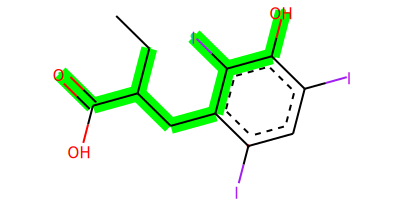

In [13]:
from rdkit.Chem import MolFromSmiles #good
mol = MolFromSmiles("CCC(CC1=C(I)C(O)=C(I)C=C1I)C(O)=O")
svg_iophenoxate, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=4e-2,
                                                      addHs=False)
img

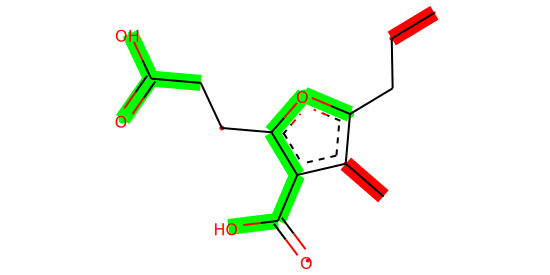

In [14]:
inchi = requests.get(IUPAC_REST.format("3-carboxy-4-methyl-5-propyl-2-furanpropionicacid")).content.decode("utf8")
mol = MolFromInchi(inchi)
svg_cmpf, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-2,
                                                      addHs=False,
                                                      img_height=275,
                                                      img_width=550)
img # good

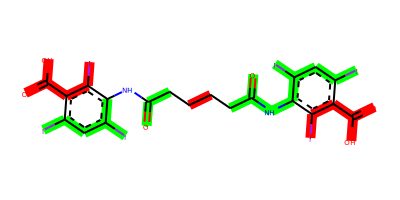

In [15]:
inchi = requests.get(IUPAC_REST.format("iodipamide")).content.decode("utf8")  # nope
mol = MolFromInchi(inchi)
svg_iodipamide, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

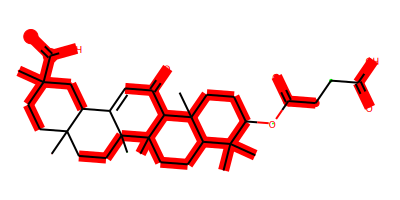

In [16]:
inchi = requests.get(IUPAC_REST.format("carbenoxolone")).content.decode("utf8")  # nope
mol = MolFromInchi(inchi)
svg_carbenoxolone, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

In [17]:
# save iophenoxate & cmpf
from molexplain.utils import DATA_PATH
EXAMPLES_PATH = os.path.join(DATA_PATH, "examples")

os.makedirs(EXAMPLES_PATH, exist_ok=True)

with open(os.path.join(EXAMPLES_PATH, "ppb_motif_iophoxonate.svg"), "w+") as handle:
    handle.write(svg_iophenoxate)

with open(os.path.join(EXAMPLES_PATH, "ppb_motif_cmpf.svg"), "w+") as handle:
    handle.write(svg_cmpf)  

In [18]:
filtered[0]

'InChI=1S/C12H16O5/c1-3-4-8-7(2)11(12(15)16)9(17-8)5-6-10(13)14/h3-6H2,1-2H3,(H,13,14)(H,15,16)'

In [19]:
filtered[4]

'InChI=1/C12H16O5/c1-3-4-8-7(2)11(12(15)16)9(17-8)5-6-10(13)14/h3-6H2,1-2H3,(H,13,14)(H,15,16)/f/h13,15H'